<a href="https://colab.research.google.com/github/Yuliana2905/Laboratorio-4-procesamiento-de-se-ales-/blob/main/Laboratorio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PARTE A

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch, windows
from pathlib import Path

In [123]:
FS = 5000
data = np.loadtxt("/Señal EMG5000.txt")
N = len(data)
t = np.arange(N) / FS
duration = N / FS

print(f"Señal cargada: {N} muestras, {duration:.2f} s de duración")


Señal cargada: 50000 muestras, 10.00 s de duración


In [124]:
segment_length = N // 5
segments = []

for i in range(5):
    start = i * segment_length
    end = (i+1) * segment_length if i < 4 else N
    segments.append((start, end))

In [125]:
def mean_median_freq(signal, fs):
    freqs, Pxx=welch(signal, fs=fs, window="hamming", nperseg=1024)
    P=Pxx
    total_power=np.trapz(P, freqs)
    mean_freq=np.trapz(freqs * P, freqs) / total_power
    cumulative=np.cumsum(P) * (freqs[1] - freqs[0])
    median_freq = freqs[np.where(cumulative >= total_power/2)[0][0]]

    return mean_freq, median_freq

In [126]:
results = []
for i, (s, e) in enumerate(segments, start=1):
    seg = data[s:e]
    meanf, medf = mean_median_freq(seg, FS)
    results.append([i, meanf, medf])

df = pd.DataFrame(results, columns=["Contracción", "Frecuencia Media (Hz)", "Frecuencia Mediana (Hz)"])
print(df)

   Contracción  Frecuencia Media (Hz)  Frecuencia Mediana (Hz)
0            1              77.435275                 9.765625
1            2              76.768538                 9.765625
2            3              78.469705                 9.765625
3            4              77.514729                 9.765625
4            5              76.758152                 9.765625


/tmp/ipython-input-2398714140.py:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_power=np.trapz(P, freqs)
/tmp/ipython-input-2398714140.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  mean_freq=np.trapz(freqs * P, freqs) / total_power


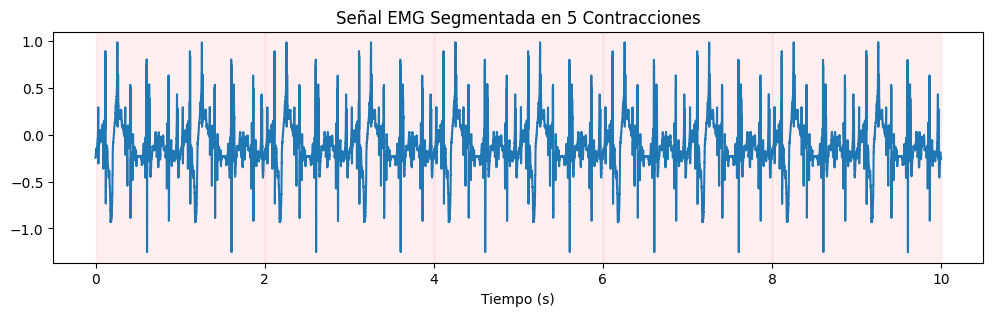

In [127]:
plt.figure(figsize=(12,3))
plt.plot(t, data, label="Señal EMG")
for s, e in segments:
    plt.axvspan(s/FS, e/FS, color='pink', alpha=0.25)
plt.xlabel("Tiempo (s)")
plt.title("Señal EMG Segmentada en 5 Contracciones")
plt.show()

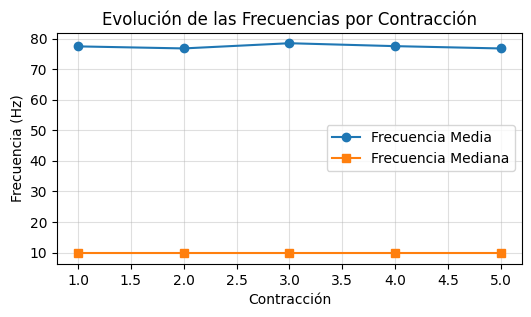

In [128]:
plt.figure(figsize=(6,3))
plt.plot(df["Contracción"], df["Frecuencia Media (Hz)"], marker='o', label="Frecuencia Media")
plt.plot(df["Contracción"], df["Frecuencia Mediana (Hz)"], marker='s', label="Frecuencia Mediana")
plt.xlabel("Contracción")
plt.ylabel("Frecuencia (Hz)")
plt.title("Evolución de las Frecuencias por Contracción")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## PARTE B

Frecuencia de muestreo estimada: 10000.0 Hz


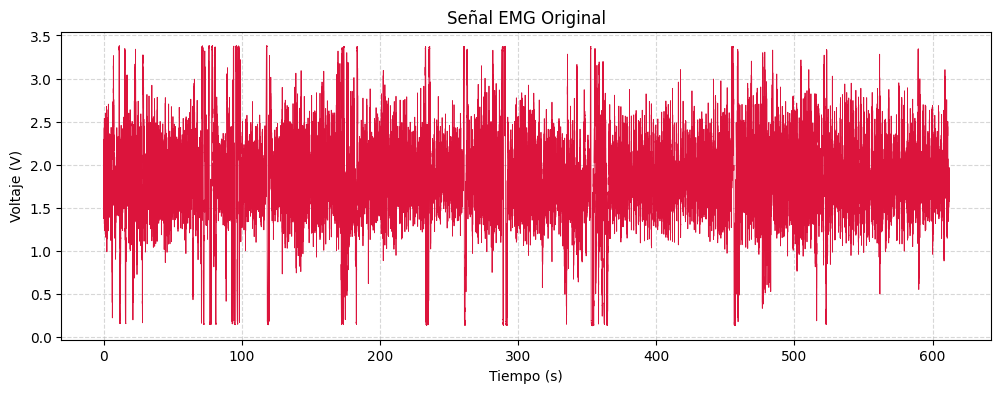

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


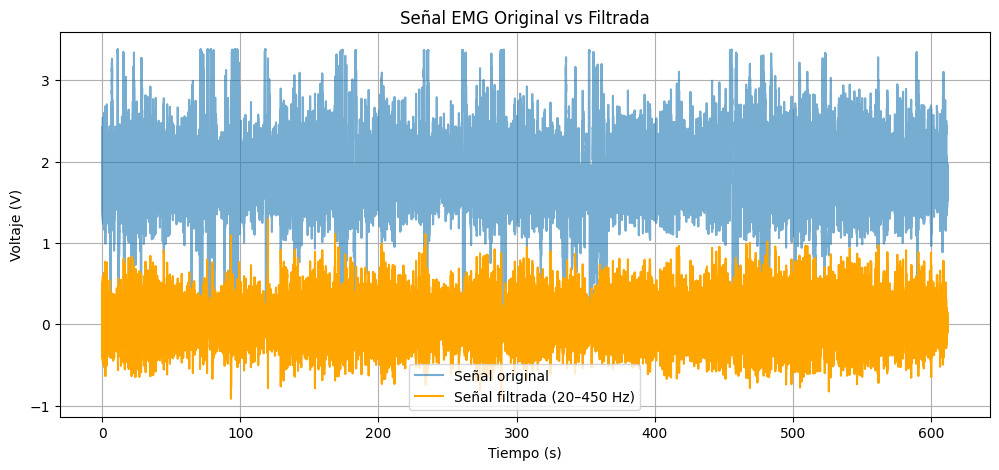

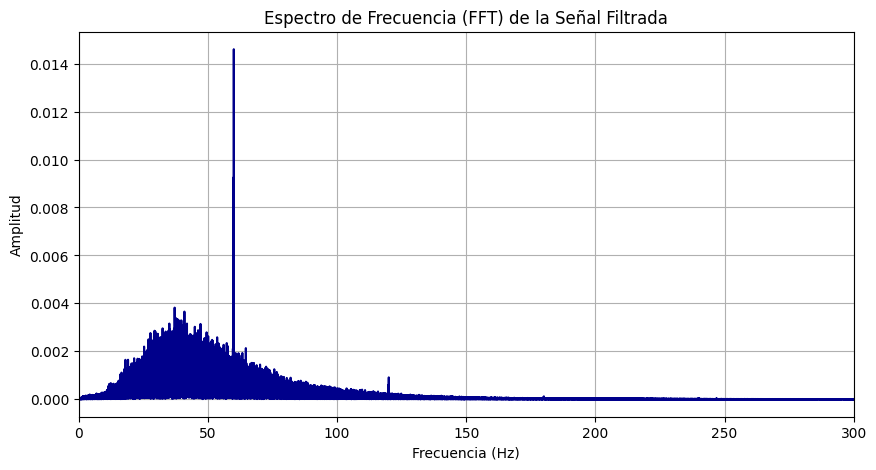

,Contracción,Frecuencia Media (Hz),Frecuencia Mediana (Hz)
0,1,46.919399,48.828125
1,2,44.579806,39.062500
2,3,44.941430,39.062500
3,4,46.162510,39.062500
4,5,46.081868,48.828125


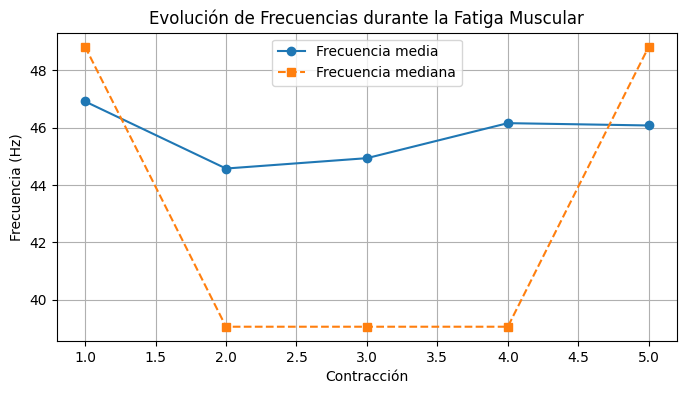

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt, welch


ruta = '/content/Captura_1_REAL.txt'
data = np.loadtxt(ruta, skiprows=1)
tiempo = data[:, 0]
voltaje = data[:, 1]

mask = tiempo <= 30
tiempo = tiempo[mask]
voltaje = voltaje[mask]

fs = 1 / (tiempo[1] - tiempo[0])

ruta = '/content/Captura_1_REAL.txt'
data = np.loadtxt(ruta, skiprows=1)
tiempo = data[:, 0]
voltaje = data[:, 1]

fs = 1 / (tiempo[1] - tiempo[0])
print(f"Frecuencia de muestreo estimada: {fs:.1f} Hz")

plt.figure(figsize=(12, 4))
plt.plot(tiempo, voltaje, color='crimson', linewidth=0.6)
plt.title("Señal EMG Original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

lowcut = 20
highcut = 450
order = 1
nyquist = fs / 2
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(order, [low, high], btype='band')

signal_filtrada = filtfilt(b, a, voltaje)

plt.figure(figsize=(12,5))
plt.plot(tiempo, voltaje, alpha=0.6, label='Señal original')
plt.plot(tiempo, signal_filtrada, label='Señal filtrada (20–450 Hz)', color='orange')
plt.title('Señal EMG Original vs Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.legend()
plt.grid(True)
plt.show()

n = len(signal_filtrada)
fft_vals = np.fft.fft(signal_filtrada)
fft_freq = np.fft.fftfreq(n, d=1/fs)

mask = fft_freq > 0
fft_freq = fft_freq[mask]
fft_magnitude = np.abs(fft_vals[mask]) * (2 / n)

plt.figure(figsize=(10,5))
plt.plot(fft_freq, fft_magnitude, color='darkblue')
plt.title("Espectro de Frecuencia (FFT) de la Señal Filtrada")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.xlim(0, 300)
plt.grid(True)
plt.show()

segmentos = np.array_split(signal_filtrada, 5)

resultados = []
for i, seg in enumerate(segmentos, start=1):
    f, Pxx = welch(seg, fs=fs, nperseg=1024)
    f_media = np.sum(f * Pxx) / np.sum(Pxx)
    energia_acum = np.cumsum(Pxx)
    f_mediana = f[np.where(energia_acum >= energia_acum[-1]/2)[0][0]]
    resultados.append([i, f_media, f_mediana])

tabla = pd.DataFrame(resultados, columns=['Contracción', 'Frecuencia Media (Hz)', 'Frecuencia Mediana (Hz)'])
display(tabla)

plt.figure(figsize=(8,4))
plt.plot(tabla['Contracción'], tabla['Frecuencia Media (Hz)'], 'o-', label='Frecuencia media')
plt.plot(tabla['Contracción'], tabla['Frecuencia Mediana (Hz)'], 's--', label='Frecuencia mediana')
plt.title("Evolución de Frecuencias durante la Fatiga Muscular")
plt.xlabel("Contracción")
plt.ylabel("Frecuencia (Hz)")
plt.legend()
plt.grid(True)
plt.show()


#PARTE C

Frecuencia de muestreo estimada: 10000.0 Hz
Segments: 460 (longitudes min/max = 652 / 653)


,Contracción,Frecuencia_media_Hz,Frecuencia_mediana_Hz,Frecuencia_pico_Hz,Ratio_potencia_>200Hz
0,1,47.520810,45.941807,61.255743,0.000082
1,2,45.855413,45.941807,30.627871,0.000040
2,3,32.735130,30.627871,30.627871,0.000276
3,4,48.829562,45.941807,45.941807,0.000073
4,5,35.492053,30.627871,30.627871,0.000096
5,6,60.134376,61.255743,76.569678,0.000258
6,7,40.136117,45.941807,45.941807,0.000240
7,8,53.438502,61.255743,61.255743,0.000043
8,9,38.396617,30.627871,30.627871,0.000070
9,10,48.694653,45.941807,45.941807,0.000095


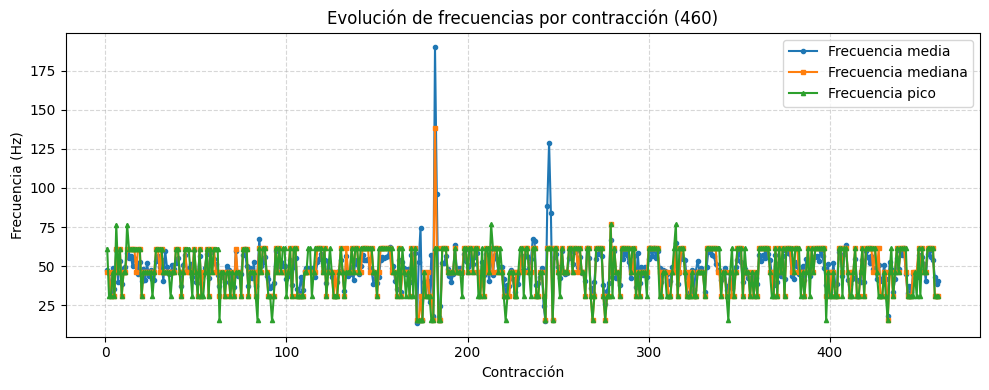

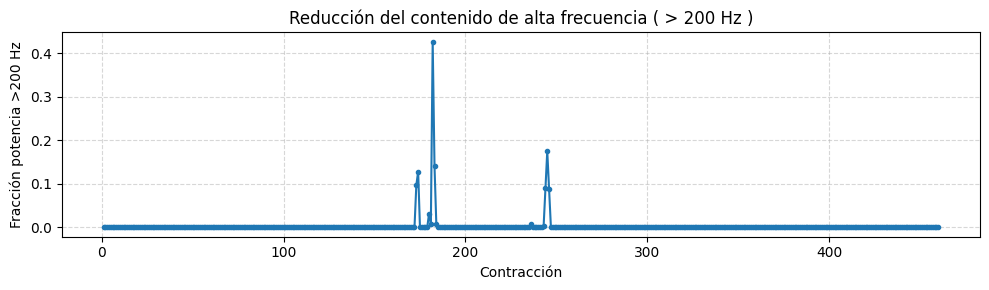

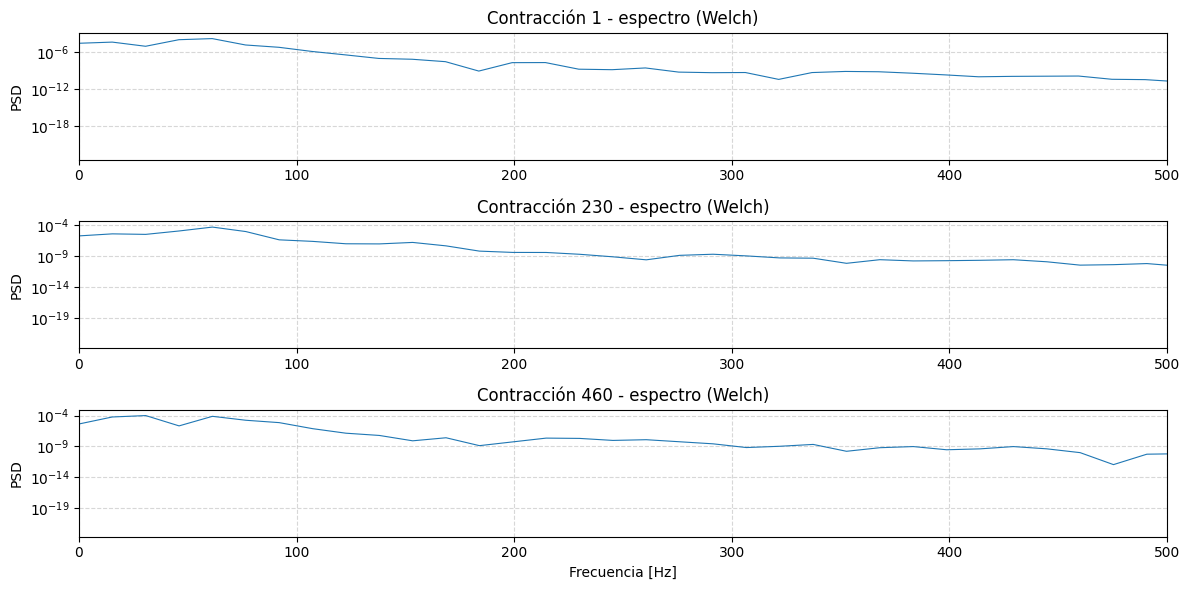

Resumen estadístico (frecuencia pico):
count    460.000000
mean      47.499650
std       14.324735
min       15.313936
25%       30.674847
50%       46.012270
75%       61.349693
max       76.687117
Name: Frecuencia_pico_Hz, dtype: float64

Frecuencia media promedio (primer 46 contr.): 48.44 Hz
Frecuencia media promedio (último 46 contr.): 46.98 Hz
Tendencia: disminución de la frecuencia media → indicativo de fatiga.


In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch

ruta = '/content/Captura_1_REAL.txt'

data = np.loadtxt(ruta, skiprows=1)
tiempo = data[:,0]
voltaje = data[:,1]
fs = 1.0 / np.mean(np.diff(tiempo))
print(f"Frecuencia de muestreo estimada: {fs:.1f} Hz")

duracion = 30.0
mask = tiempo <= duracion
tiempo_30 = tiempo[mask]
voltaje_30 = voltaje[mask]


lowcut, highcut, order = 20.0, 500.0, 4
b, a = butter(order, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
voltaje_filtrado = filtfilt(b, a, voltaje_30)


n_contr = 460
segmentos = np.array_split(voltaje_filtrado, n_contr)
tiempos_seg = np.array_split(tiempo_30, n_contr)
print(f"Segments: {len(segmentos)} (longitudes min/max = {min(len(s) for s in segmentos)} / {max(len(s) for s in segmentos)})")

resultados = []
for i, seg in enumerate(segmentos, start=1):
    if len(seg) < 4:

        resultados.append([i, np.nan, np.nan, np.nan, np.nan])
        continue

    nperseg = min(1024, len(seg))
    f, Pxx = welch(seg, fs=fs, nperseg=nperseg)
    # frecuencia media (centroide)
    f_media = np.sum(f * Pxx) / np.sum(Pxx)
    # frecuencia mediana (50% de energía acumulada)
    energia_acum = np.cumsum(Pxx)
    idx_med = np.where(energia_acum >= energia_acum[-1]/2)[0]
    if idx_med.size == 0:
        f_med = np.nan
    else:
        f_med = f[idx_med[0]]
    # pico espectral (frecuencia de máxima magnitud)
    f_pico = f[np.argmax(Pxx)]
    # proporción de potencia en altas frecuencias (>200 Hz)
    mask_high = f > 200
    if np.sum(Pxx) > 0:
        ratio_high = np.sum(Pxx[mask_high]) / np.sum(Pxx)
    else:
        ratio_high = np.nan

    resultados.append([i, f_media, f_med, f_pico, ratio_high])

# Tabla
df_res = pd.DataFrame(resultados, columns=['Contracción','Frecuencia_media_Hz','Frecuencia_mediana_Hz','Frecuencia_pico_Hz','Ratio_potencia_>200Hz'])
display(df_res.head(10))


plt.figure(figsize=(10,4))
plt.plot(df_res['Contracción'], df_res['Frecuencia_media_Hz'], '-o', markersize=3, label='Frecuencia media')
plt.plot(df_res['Contracción'], df_res['Frecuencia_mediana_Hz'], '-s', markersize=3, label='Frecuencia mediana')
plt.plot(df_res['Contracción'], df_res['Frecuencia_pico_Hz'], '-^', markersize=3, label='Frecuencia pico')
plt.xlabel('Contracción')
plt.ylabel('Frecuencia (Hz)')
plt.title('Evolución de frecuencias por contracción (460)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,3))
plt.plot(df_res['Contracción'], df_res['Ratio_potencia_>200Hz'], '-o', markersize=3)
plt.xlabel('Contracción')
plt.ylabel('Fracción potencia >200 Hz')
plt.title('Reducción del contenido de alta frecuencia ( > 200 Hz )')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

indices_ejemplo = [1, int(n_contr/2), n_contr]
plt.figure(figsize=(12,6))
for idx, pos in enumerate(indices_ejemplo, start=1):
    seg = segmentos[pos-1]
    nperseg = min(1024, len(seg))
    f, Pxx = welch(seg, fs=fs, nperseg=nperseg)
    plt.subplot(3,1,idx)
    plt.semilogy(f, Pxx, linewidth=0.8)
    plt.xlim(0, 500)
    plt.ylabel('PSD')
    plt.title(f'Contracción {pos} - espectro (Welch)')
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xlabel('Frecuencia [Hz]')
plt.tight_layout()
plt.show()


print("Resumen estadístico (frecuencia pico):")
print(df_res['Frecuencia_pico_Hz'].describe())


k = max(1, int(0.1 * n_contr))
prim_mean = np.nanmean(df_res['Frecuencia_media_Hz'][:k])
ult_mean = np.nanmean(df_res['Frecuencia_media_Hz'][-k:])
print(f"\nFrecuencia media promedio (primer {k} contr.): {prim_mean:.2f} Hz")
print(f"Frecuencia media promedio (último {k} contr.): {ult_mean:.2f} Hz")
if prim_mean > ult_mean:
    print("Tendencia: disminución de la frecuencia media → indicativo de fatiga.")
elif prim_mean < ult_mean:
    print("Tendencia: aumento de la frecuencia media.")
else:
    print("Tendencia: sin cambio claro en frecuencia media.")

Frecuencia de muestreo estimada: 10000.00 Hz


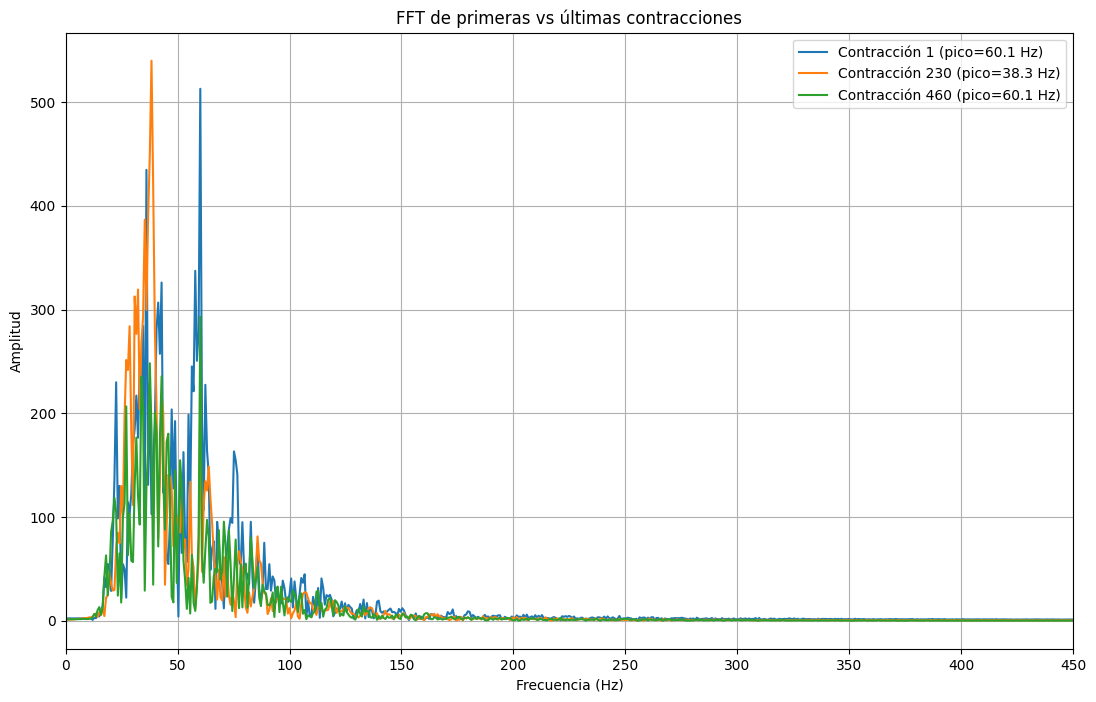

,Contracción,Pico espectral (Hz)
0,1,60.141332
1,2,39.091866
2,3,60.141332
3,4,38.340099
4,5,39.843633


In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

ruta = '/content/Captura_1_REAL.txt'
data = np.loadtxt(ruta, skiprows=1)

tiempo = data[:, 0]
voltaje = data[:, 1]
# frecuencia de muestreo
fs = 1 / np.mean(np.diff(tiempo))
print(f"Frecuencia de muestreo estimada: {fs:.2f} Hz")

# 3.  pasa banda (20–450 Hz)
lowcut, highcut, order = 20, 450, 4
b, a = butter(order, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
voltaje_filtrado = filtfilt(b, a, voltaje)

# 4. Segmentado
n_contr = 460
segmentos = np.array_split(voltaje_filtrado, n_contr)

# 5. FFT por contracción + Pico espectral
picos = []
plt.figure(figsize=(13, 8))
for i, seg in enumerate(segmentos, start=1):

    N = len(seg)
    fft_vals = np.fft.fft(seg)
    fft_freq = np.fft.fftfreq(N, 1/fs)

    mask = fft_freq > 0
    frecs = fft_freq[mask]
    amplitud = np.abs(fft_vals[mask])

    # Calcular pico espectral
    pico = frecs[np.argmax(amplitud)]
    picos.append(pico)

    # Graficar contracciones: primera, media y última
    if i in [1, int(n_contr/2), n_contr]:
        plt.plot(frecs, amplitud, label=f"Contracción {i} (pico={pico:.1f} Hz)")

plt.xlim([0, 450])
plt.title("FFT de primeras vs últimas contracciones")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

# Tabla de picos para el informe
df_picos = pd.DataFrame({"Contracción": range(1, n_contr+1),
                         "Pico espectral (Hz)": picos})

display(df_picos.head())